# Two Layer Neural Network

In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

### Import Data

(1797, 64)


<Figure size 432x288 with 0 Axes>

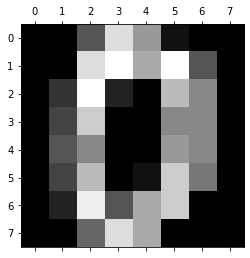

In [7]:
digits = load_digits()
print(digits.data.shape)

plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

### Split Data 

In [4]:
X_full = digits.data
y_full = digits.target

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3)

print("X_Train :", X_train.shape)
print("y_Train :", y_train.shape)
print("\nX_Test :", X_test.shape)
print("y_Test :", y_test.shape)

X_Train : (1257, 64)
y_Train : (1257,)

X_Test : (540, 64)
y_Test : (540,)


### Pre Processing

In [87]:
X_train = X_train - np.mean(X_train)

# Neural Network Model
- image normalization 
- xavier weight initilization
- batch normalization
- adam optimizer
- model ensambles give 2% more accuracy
- Inverted drop out (Regularization) + 2%

In [83]:
def relu(x):
    return x * (x > 0)


def relu_derivative(x):
    return 1. * (x > 0)


def cross_entropy(X,y):
    m = y.shape[0]
    p = stable_softmax(X)

    log_likelihood = -np.log(p[range(m),y] + 0.00001)
    loss = np.sum(log_likelihood) / m
    return loss


def delta_cross_entropy(X,y):
    m = y.shape[0]
    grad = softmax(X)
    grad[range(m),y] -= 1
    grad = grad/m
    return grad


def cross_entropy_Loss(z, y):
    predict_1 = y * np.log(z)
    predict_0 = (1 - y) * np.log(1 - z)
    
    #print("\n pred1 \n", predict_1)
    #print("\n pred0 \n", predict_0)
    
    return -sum(predict_1 + predict_0) / X.shape[0]

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference

def stable_softmax(X):
    exps = np.exp(X - np.max(X))
    return exps / np.sum(exps)

def softmax_grad(softmax):
    # Reshape the 1-d softmax to 2-d so that np.dot will do the matrix multiplication
    s = softmax.reshape(-1,1)
    #print(s.shape)
    return np.diagflat(s) - np.dot(s, s.T)


def softmax2(z):
    assert len(z.shape) == 2
    s = np.max(z, axis=1)
    s = s[:, np.newaxis] # necessary step to do broadcasting
    e_x = np.exp(z - s)
    div = np.sum(e_x, axis=1)
    div = div[:, np.newaxis] # dito
    return e_x / div




In [32]:
a = np.random.randn(2, 10) * np.sqrt(1. / 64.0 + 10.0)
a_sm = softmax2(a)

a_sm_grad = softmax_grad(a_sm)
a_sm_grad.shape

(20, 20)

In [6]:
#X = np.c_[np.ones((X.shape[0],1)), X[:]]

In [77]:
class NeuralNetwork:
    def __init__(self, x, y, lr=0.00005):
        self.input      = x
        self.w1         = np.random.randn(64, 32) * np.sqrt(1. / 64.0 + 32.0)     #xavier distribution
        self.w2         = np.random.randn(32, 10) * np.sqrt(1. / 32.0 + 10.0)
        self.y          = y
        self.output     = np.zeros(self.y.shape)
        self.lr = lr

    def feedforward(self):
        self.layer1 = relu(self.input@self.w1)
        self.output = self.layer1@self.w2
        
    def backprop(self):
        self.w2 = self.w2 - self.lr * self.layer1.T @ delta_cross_entropy(self.output, self.y)
        dir_w1 = ((delta_cross_entropy(self.output, self.y) @ self.w2.T).T @ relu_derivative(self.input@self.w1) @ (self.input@self.w1).T @ self.input).T
        self.w1 = self.w1 - self.lr * dir_w1

    def fit(self, num_epochs=300):
        
        cost_val = []
        
        for i in range(num_epochs):
            j =  MSE_loss(self.output, y)
            cost_val.append(j)
            
            self.feedforward_relu()
            self.backprop_relu()
        return cost_val

In [84]:
nn = NeuralNetwork(X_train, y_train, 0.00005)

print("X", nn.input.shape)
print("w1", nn.w1.shape)
print("w2", nn.w2.shape)
print("y", nn.y.shape)
print("y_pred", nn.output.shape )

layer1 = relu(nn.input@nn.w1)
layer2 = (layer1@nn.w2)
#print(layer2[0:2])
layer2 = layer1@nn.w2

nn.feedforward()
y_pred = nn.output
#print("\n", nn.output[0:2])

cross_entropy(y_pred, y_train)

delta_cross_entropy(y_pred, y_train).shape

nn.backprop()

print("w1 after backprop:", nn.w1.shape)
print("w2 after backprop:", nn.w2.shape)



X (1257, 64)
w1 (64, 32)
w2 (32, 10)
y (1257,)
y_pred (1257,)
w1 after backprop: (64, 32)
w2 after backprop: (32, 10)


<ipython-input-83-748a4aefe270>:19: RuntimeWarning: invalid value encountered in true_divide
  return e_x / e_x.sum(axis=0) # only difference


In [70]:
mat =  ((delta_cross_entropy(nn.output, nn.y) @ nn.w2.T).T @ relu_derivative(nn.input@nn.w1) @ (nn.input@nn.w1).T @ X).T
mat.shape

<ipython-input-40-b631e27b23a9>:19: RuntimeWarning: invalid value encountered in true_divide
  return e_x / e_x.sum(axis=0) # only difference


(64, 32)

In [63]:
relu_derivative(nn.input@nn.w1).shape

(1257, 32)

In [ ]:
#change y into numpy array
uq = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

y = np.zeros((X.shape[0], 10))

for i in range(0, 10):
    for j in range(0, len(y_train)):
        if y_train[j] == uq[i]:
            y[j, i] = 1

In [ ]:
X = X_train

w = np.random.normal(0, 0.01, (64, 32))

nn = NeuralNetwork(X, y, 0.00005)

print("X: ", nn.input.shape)
print("w1", nn.weights1.shape)
print("w2", nn.weights2.shape)
print("y", nn.y.shape)
print("y_pred", nn.output.shape)

#nn.feedforward_sigmoid()
#nn.backprop_sigmoid()
#nn.fit(10000)
epochs = 20
cost_val = nn.fit(epochs )

#print("y_pred", nn.output)


In [ ]:
plt.plot(range(0, epochs), cost_val, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")

In [ ]:
print("y_pred", nn.output[:5])

In [ ]:
np.random.randn(64, 32)

### Calculate Accuracy

In [ ]:
def accuracy(y_pred, y):
    cnt = 0
    for i in range(y_pred.shape[0]):
        temp = 0
        ind = -1
        for j in range(10):
            if y_pred[i][j] > temp:
                temp = y_pred[i][j]
                ind = j
        if y[i][ind] == 1:
            cnt = cnt + 1

    print("accuracy: ", cnt/y_pred.shape[0])


accuracy(nn.output, y)

# Pytorch Implementation